In [5]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
tag_recback = pd.read_excel('C:/Users/nwang/Desktop/nlp/tag_rec.xlsx')
tag_expback =pd.read_excel('C:/Users/nwang/Desktop/nlp/tag_exp.xlsx')

In [7]:
tag_expback=tag_expback.append(tag_expback.loc[13788,:].to_dict(),ignore_index=True)

In [8]:
tag_recback.shape,tag_expback.shape

((13791, 37), (13791, 37))

In [5]:
tag_expback.tail(5)

,Accuracy,ATM,Business_Services,Cards,Communication,Community,Credit_Union_Difference,Denied_Loan,Do_Not_Recommend,Ease_Of_Use,...,Rates,Refreshments,Reputation_Love,Satisfied,Service_Quality,Statements,Survey_General,Video_Tellers,Wait_Time,x
13786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Negative
13787,NaN,NaN,NaN,Negative,Negative,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Negative,NaN,NaN,NaN,NaN,Negative
13788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13789,NaN,Negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Negative
13790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
tag=pd.concat([tag_recback,tag_expback],ignore_index=True)
tag.shape

(27582, 37)

In [8]:
pd_text = pd.read_excel("C:/Users/nwang/Desktop/nlp/201801-201903ForNickA_text analytics.xlsx")

In [22]:
pd_text.tail(5)

,Start Date,End Date,Response Received Date,Survey Name,Likelihood to Recommend-Value,Likely to Recommend Comment,Likely to Recommend Comment Tags,Improve Experience Comment,Improve Experience Comment Tags,Overall Satisfaction-Value,Transaction Type,Transaction Location Description,Remove
13786,2018-01-01,2019-03-31,2019-03-31 19:25:06,Transactional Survey,10.0,Satisfied so far - very easy to talk to a real...,"Service_Quality(Positive), Ease_Of_Use(Positiv...","Not having the 30 day hold, or having some way...","x(Negative), Policy_Procedure(Negative)",10.0,New Member,Online,NaN
13787,2018-01-01,2019-03-31,2019-03-31 19:57:27,Transactional Survey,5.0,Credit card support was ridiculous. I'm holdi...,"x(Negative), Service_Quality(Negative), Cards(...",Information on fund holds when transferring in...,"x(Negative), Policy_Procedure(Negative), Servi...",5.0,New Member,Online,NaN
13788,2018-01-01,2019-03-31,2019-03-31 20:07:22,Transactional Survey,8.0,Mobile access,"x(Positive), Mobile_Services(Positive)",NaN,NaN,10.0,Remote Service,Mobile,NaN
13789,2018-01-01,2019-03-31,2019-03-31 23:29:54,Transactional Survey,10.0,"New ,everything seams to be in order,in line","x(Positive), Limited_Experience(Neutral), Sati...",More a.t.m,"x(Negative), ATM(Negative)",9.0,New Member,CHICU,NaN
13790,2018-01-01,2019-03-31,2019-03-31 23:38:50,Transactional Survey,10.0,Representatives are very knowledgeable and if ...,"Service_Quality(Positive), x(Positive)",NaN,NaN,10.0,Call Center,MCCI,NaN


In [4]:
tag_recback['x'].unique()

array(['Mixed', 'Positive', 'Neutral', nan, 'Negative'], dtype=object)

In [4]:
# rec = list(pd_text['Likely to Recommend Comment'].values)
# exp = list(pd_text['Improve Experience Comment'].values)

In [5]:
# len(rec),len(exp)

(13791, 13791)

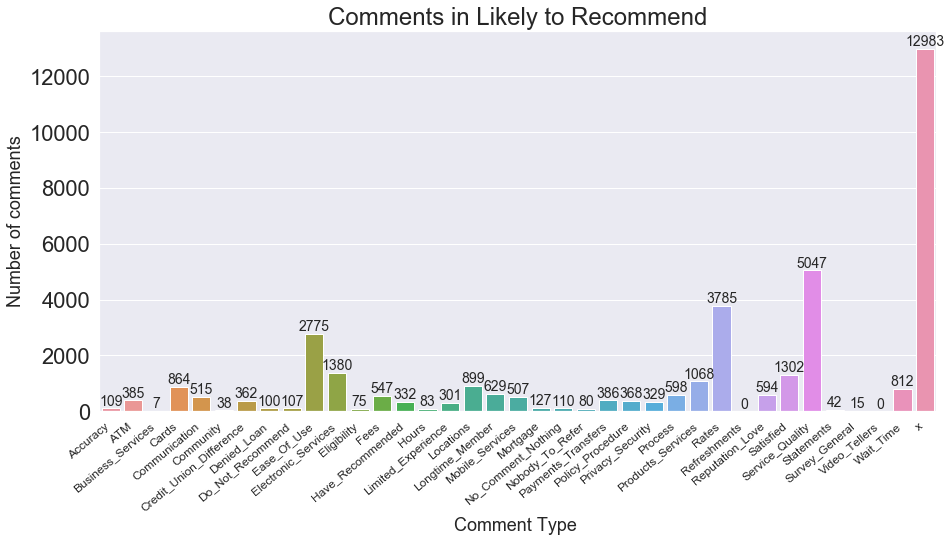

In [11]:
categories = list(tag_recback.columns.values)
sns.set(font_scale =2)
plt.figure(figsize=(15,7))
ax= sns.barplot(categories, tag_recback.count().values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontsize=12)
plt.title("Comments in Likely to Recommend", fontsize=24)
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Comment Type ', fontsize=18)
rects = ax.patches

labels = tag_recback.count().values
# labels=categories
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=14)
plt.show()

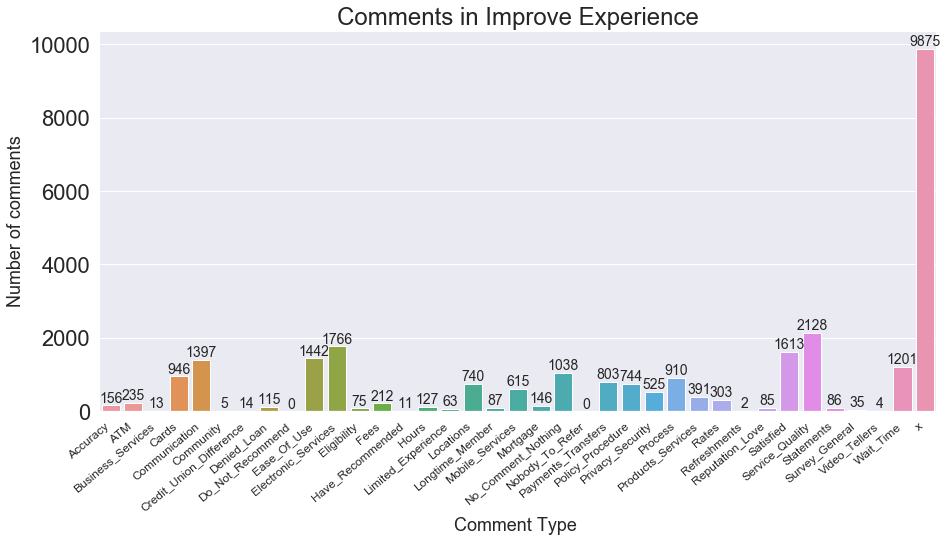

In [12]:
categories = list(tag_expback.columns.values)
sns.set(font_scale =2)
plt.figure(figsize=(15,7))
ax= sns.barplot(categories, tag_expback.count().values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontsize=12)
plt.title("Comments in Improve Experience", fontsize=24)
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Comment Type ', fontsize=18)
rects = ax.patches

labels = tag_expback.count().values
# labels=categories
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=14)
plt.show()

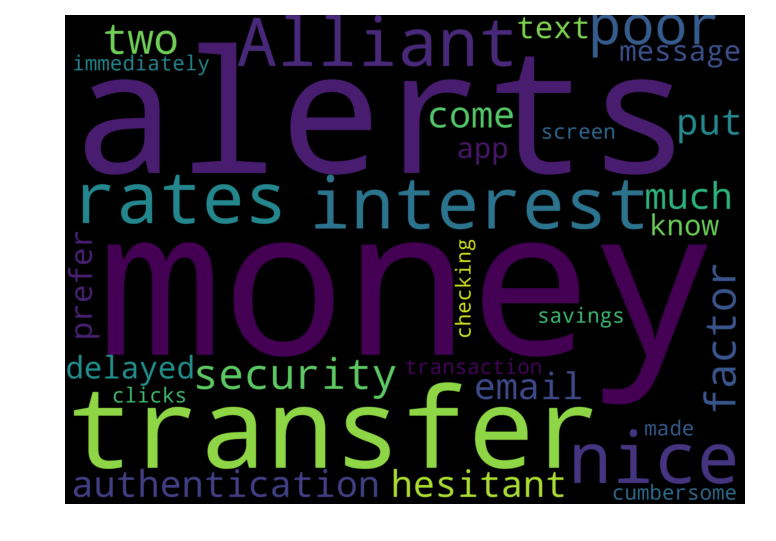

In [54]:
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize=(40,9))

subset =pd_text.loc[ pd_text['Likely to Recommend Comment'].notnull(), ['Likely to Recommend Comment']]
text = subset['Likely to Recommend Comment'].values

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800).generate(text[0])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

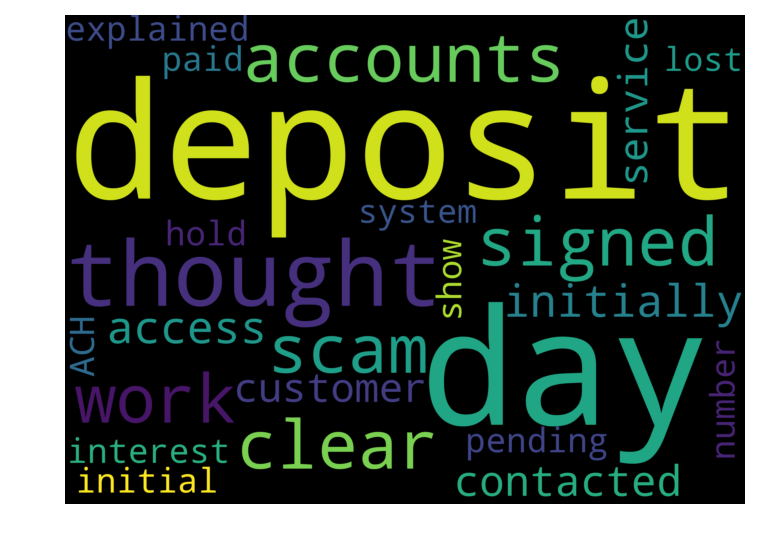

In [55]:
plt.figure(figsize=(40,9))

subset =pd_text.loc[ pd_text['Improve Experience Comment'].notnull(), ['Improve Experience Comment']]
text = subset['Improve Experience Comment'].values

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800).generate(text[0])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Text clean

In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re, string
import sys
import pickle
import warnings

In [9]:
from stop_words import get_stop_words
stopwords = get_stop_words('en')

In [11]:
# stemmer = SnowballStemmer("english")
lemmatizer = nltk.WordNetLemmatizer()
# stopwords = nltk.corpus.stopwords.words('english')
transtbl = str.maketrans(string.punctuation, ' '*len(string.punctuation))
def textclean(text):
    
    if not isinstance(text,float) :
        text=str(text)
#         print(type(text),text)
        text = ' '.join([appos[we] if we in appos else we for we in text.split()])
        text =text.translate(transtbl)
#         tokens = [lemmatizer.lemmatize(t.lower(),'v')
#                  for t in nltk.word_tokenize(text)
#                  if t.lower() not in stopwords]
        return ' '.join(text.split())
    else:
        return np.nan

In [12]:
pd_text['rec'] = pd_text['Likely to Recommend Comment'].apply(textclean)
pd_text['exp'] = pd_text['Improve Experience Comment'].apply(textclean)

In [9]:
pd_text['rec'] = pd_text['Likely to Recommend Comment']
pd_text['exp'] = pd_text['Improve Experience Comment']

In [11]:
pd_text['rec'].loc[pd_text['rec'].notna()==True].shape

(12968,)

In [12]:
tag['text'] = pd.concat([pd_text['rec'],pd_text['exp']],ignore_index=True)
tag.shape

(27582, 38)

In [14]:
tag=tag.loc[tag['text'].notna()==True]
tag.shape

(22702, 38)

In [20]:
tag.x.unique()

array(['Mixed', 'Positive', 'Neutral', 'Negative'], dtype=object)

In [15]:
with open('C:/Users/nwang/Desktop/nlp/code/tag_cl_version2.pkl', 'wb') as outfile:
    pickle.dump(tag, outfile)

In [32]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [6]:
rec_df = tag_recback.fillna('nan').apply(le.fit_transform)
exp_df = tag_expback.fillna('nan').apply(le.fit_transform)

In [52]:
tag=tag.fillna('nan').apply(le.fit_transform)

In [ ]:
# nltk.set_proxy(proxy = None)
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


### LSTM

In [10]:
# from ml_utils import *

from keras.models import Model, Sequential
from keras.layers import Input, Dense, Activation
import csv
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

import numpy as np
from keras.layers import Dense, Input, Dropout, LSTM, Activation, Embedding
from keras.preprocessing import sequence
np.random.seed(1)

In [4]:
def read_glove_vec(glove_file):
    with open(glove_file,encoding="utf8") as f:
        words = set()
        word_to_vec_map = {}
        for line in f:
            line = line.strip().split()
            curr_word = line[0]
            words.add(curr_word)
            word_to_vec_map[curr_word] = np.array(line[1:], dtype=np.float64)
        
        i = 1
        words_to_index = {}
        for w in sorted(words):
            words_to_index[w] = i
            i = i + 1
    return words_to_index, word_to_vec_map

In [5]:
word_to_index, word_to_vec_map = read_glove_vec('C:/Users/nwang/Desktop/nlp/glove.6B.50d.txt')

In [6]:
def pretrained_embedding_layer(word_to_vec_map, word_to_index):
    
    vocab_len = len(word_to_index) + 1  
    emb_dim = list(word_to_vec_map.values())[0].shape[0]
    

    emb_matrix = np.zeros((vocab_len, emb_dim))

    for word, index in word_to_index.items():
        emb_matrix[index, :] = word_to_vec_map[word]

   
    return Embedding(
        input_dim=vocab_len, 
        output_dim=emb_dim, 
        trainable=False, 
        weights=[emb_matrix])

In [7]:
def np_model(input_shape, word_to_vec_map, word_to_index):
    # Input layer
    sentence_indices = Input(shape=input_shape, dtype='int32')
    
    # Embedding layer
    embedding_layer = pretrained_embedding_layer(word_to_vec_map, word_to_index)
    embeddings = embedding_layer(sentence_indices)   
    
    # 2-layer LSTM
    X = LSTM(128, return_sequences=True, recurrent_dropout=0.5)(embeddings)  # N->N RNN
    X = Dropout(0.5)(X)
    X = LSTM(128, recurrent_dropout=0.5)(X)  # N -> 1 RNN
    X = Dropout(0.5)(X)
    X = Dense(5, activation='softmax')(X)
    
    # Create and return model
    model = Model(inputs=sentence_indices, outputs=X)
    
    return model

In [11]:
def load_emoji():
    X_train, Y_train = read_csv('C:/Users/nwang/Desktop/nlp/code/train_emoji.csv')
    X_test, Y_test = read_csv('C:/Users/nwang/Desktop/nlp/code/test_emoji.csv')
    return X_train, X_test, Y_train, Y_test

def read_csv(filename ):
    phrase = []
    emoji = []

    with open (filename) as csvDataFile:
        csvReader = csv.reader(csvDataFile)

        for row in csvReader:
            phrase.append(row[0])
            emoji.append(row[1])

    X = np.asarray(phrase)
    Y = np.asarray(emoji, dtype=int)

    return X, Y

X_train, X_test, Y_train, Y_test = load_emoji()
maxlen = len(max(X_train, key=len).split())
print(maxlen)

10


In [20]:
X_train, X_test, Y_train, Y_test = load_emoji()

In [21]:
maxlen = len(max(X_train, key=len).split())
print(maxlen)

10


In [12]:
model = np_model((maxlen,), word_to_vec_map, word_to_index)
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 10)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 10, 50)            20000050  
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 128)           91648     
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 128)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_2 (Dropout)  

In [23]:
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy'])

In [ ]:
def sentences_to_indice(X, word_to_index, max_len):
    m = X.shape[0]
    X_indices = np.zeros((m, max_len))
    
    for i in range(m):
        sentence_words = X[i].lower().split()
        j = 0
        for w in sentence_words:
            try:
                X_indices[i, j] = word_to_index[w]
                j = j + 1
            except:
                X_indices[i, j] = word_to_index['unk']
                j = j + 1
         
    return X_indices

In [24]:
X_train_indices = sentences_to_indice(X_train, word_to_index, maxlen)
X_test_indices = sentences_to_indice(X_test, word_to_index, maxlen)

In [25]:
Y_train_oh = convert_to_one_hot(Y_train, C = 5)
Y_test_oh = convert_to_one_hot(Y_test, C = 5)

In [26]:
history = model.fit(
    X_train_indices, 
    Y_train_oh, 
    epochs = 50, 
    batch_size = 32, 
    shuffle=True)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
132/132 [==============================] - 5s 38ms/step - loss: 1.5764 - acc: 0.2500
Epoch 2/50
132/132 [==============================] - 0s 974us/step - loss: 1.5410 - acc: 0.3106
Epoch 3/50
132/132 [==============================] - 0s 938us/step - loss: 1.5041 - acc: 0.3712
Epoch 4/50
132/132 [==============================] - 0s 1ms/step - loss: 1.4884 - acc: 0.3788
Epoch 5/50
132/132 [==============================] - 0s 1ms/step - loss: 1.4083 - acc: 0.4394
Epoch 6/50
132/132 [==============================] - 0s 1ms/step - loss: 1.3870 - acc: 0.4621
Epoch 7/50
132/132 [==============================] - 0s 990us/step - loss: 1.3404 - acc: 0.4848
Epoch 8/50
132/132 [==============================] - 0s 1ms/step - loss: 1.2653 - acc: 0.4621
Epoch 9/50
132/132 [==============================] - 0s 931us/step - loss: 1.2071 - acc: 0.5758
Epoch 10/50
132/132 [==============================] - 0s 915us/step - loss: 1.1210 - ac

56/56 [==============================] - 0s 6ms/step


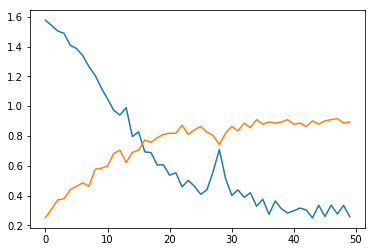

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['acc'])

loss, acc = model.evaluate(X_test_indices, Y_test_oh)